In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import pytz
sns.set()

In [15]:
screenshots = pd.read_csv('analysis/txt/screenshots.csv')
screenshots['drop_date'] = pd.to_datetime(screenshots.timestamp_drop_UTC)
screenshots['drop_date'] = screenshots.drop_date.dt.tz_localize(None)
screenshots['image_date'] = pd.to_datetime(screenshots.DateCreated)
screenshots['minutes_before_drop'] = (screenshots.drop_date - screenshots.image_date).dt.total_seconds() / 60
screenshots['minutes_before_hour_diff'] = screenshots.minutes_before_drop % 60
screenshots

,drop_number,timestamp_drop_UTC,DateCreated,timediff,source,trip,drop_number.1,timestamp_drop_UTC.1,DateCreated.1,timediff.1,...,XResolution,YCbCrPositioning,YCbCrSubSampling,YResolution,times_Q_used,timediff.5,drop_date,image_date,minutes_before_drop,minutes_before_hour_diff
0,4752,2020-09-23 19:13:52+00:00,2020-09-23 12:07:14,-7.110556,8kun_qresearch,!!Hs1Jq13jV6,4752,2020-09-23 19:13:52+00:00,2020-09-23 12:07:14,-7.110556,...,NaN,NaN,NaN,NaN,1,-7.110556,2020-09-23 19:13:52,2020-09-23 12:07:14,426.633333,6.633333
1,4716,2020-09-16 16:43:38+00:00,2020-09-16 11:23:19,-5.338611,8kun_qresearch,!!Hs1Jq13jV6,4716,2020-09-16 16:43:38+00:00,2020-09-16 11:23:19,-5.338611,...,NaN,NaN,NaN,NaN,1,-5.338611,2020-09-16 16:43:38,2020-09-16 11:23:19,320.316667,20.316667
2,4291,2020-05-20 13:45:52+00:00,2020-05-20 06:40:09,-7.095278,8kun_qresearch,!!Hs1Jq13jV6,4291,2020-05-20 13:45:52+00:00,2020-05-20 06:40:09,-7.095278,...,NaN,NaN,NaN,NaN,1,-7.095278,2020-05-20 13:45:52,2020-05-20 06:40:09,425.716667,5.716667
3,3869,2020-02-17 22:11:14+00:00,NaN,NaN,8kun_qresearch,!!Hs1Jq13jV6,3869,2020-02-17 22:11:14+00:00,NaN,NaN,...,144.0,NaN,NaN,144.0,1,NaN,2020-02-17 22:11:14,NaT,NaN,NaN
4,3685,2019-12-15 20:10:11+00:00,2019-12-02 10:28:55,-321.687778,8kun_qresearch,!!Hs1Jq13jV6,3685,2019-12-15 20:10:11+00:00,2019-12-02 10:28:55,-321.687778,...,NaN,NaN,NaN,NaN,2,-321.687778,2019-12-15 20:10:11,2019-12-02 10:28:55,19301.266667,41.266667
5,3642,2019-12-02 18:31:36+00:00,2019-12-02 10:28:55,-8.044722,8kun_projectdcomms,!!Hs1Jq13jV6,3642,2019-12-02 18:31:36+00:00,2019-12-02 10:28:55,-8.044722,...,NaN,NaN,NaN,NaN,2,-8.044722,2019-12-02 18:31:36,2019-12-02 10:28:55,482.683333,2.683333
6,3645,2019-12-02 23:45:47+00:00,2019-12-02 15:27:37,-8.302778,8kun_qresearch,!!Hs1Jq13jV6,3645,2019-12-02 23:45:47+00:00,2019-12-02 15:27:37,-8.302778,...,NaN,NaN,NaN,NaN,1,-8.302778,2019-12-02 23:45:47,2019-12-02 15:27:37,498.166667,18.166667
7,3643,2019-12-02 18:54:27+00:00,NaN,NaN,8kun_projectdcomms,!!Hs1Jq13jV6,3643,2019-12-02 18:54:27+00:00,NaN,NaN,...,144.0,NaN,NaN,144.0,1,NaN,2019-12-02 18:54:27,NaT,NaN,NaN
8,2706,2019-02-14 10:31:17+00:00,2019-02-14 18:28:05,7.946667,8chan_qresearch,NaN,2706,2019-02-14 10:31:17+00:00,2019-02-14 18:28:05,7.946667,...,NaN,NaN,NaN,NaN,1,7.946667,2019-02-14 10:31:17,2019-02-14 18:28:05,-476.800000,3.200000
9,2706,2019-02-14 10:31:17+00:00,2019-02-14 18:27:26,7.935833,8chan_qresearch,NaN,2706,2019-02-14 10:31:17+00:00,2019-02-14 18:27:26,7.935833,...,NaN,NaN,NaN,NaN,1,7.935833,2019-02-14 10:31:17,2019-02-14 18:27:26,-476.150000,3.850000


## The subset we are examining, and the outliers:

### Subset

In [63]:
subset = screenshots[abs(screenshots.timediff) < 9]
subset

,drop_number,timestamp_drop_UTC,DateCreated,timediff,source,trip,drop_number.1,timestamp_drop_UTC.1,DateCreated.1,timediff.1,...,XResolution,YCbCrPositioning,YCbCrSubSampling,YResolution,times_Q_used,timediff.5,drop_date,image_date,minutes_before_drop,minutes_before_hour_diff
0,4752,2020-09-23 19:13:52+00:00,2020-09-23 12:07:14,-7.110556,8kun_qresearch,!!Hs1Jq13jV6,4752,2020-09-23 19:13:52+00:00,2020-09-23 12:07:14,-7.110556,...,NaN,NaN,NaN,NaN,1,-7.110556,2020-09-23 19:13:52,2020-09-23 12:07:14,426.633333,6.633333
1,4716,2020-09-16 16:43:38+00:00,2020-09-16 11:23:19,-5.338611,8kun_qresearch,!!Hs1Jq13jV6,4716,2020-09-16 16:43:38+00:00,2020-09-16 11:23:19,-5.338611,...,NaN,NaN,NaN,NaN,1,-5.338611,2020-09-16 16:43:38,2020-09-16 11:23:19,320.316667,20.316667
2,4291,2020-05-20 13:45:52+00:00,2020-05-20 06:40:09,-7.095278,8kun_qresearch,!!Hs1Jq13jV6,4291,2020-05-20 13:45:52+00:00,2020-05-20 06:40:09,-7.095278,...,NaN,NaN,NaN,NaN,1,-7.095278,2020-05-20 13:45:52,2020-05-20 06:40:09,425.716667,5.716667
5,3642,2019-12-02 18:31:36+00:00,2019-12-02 10:28:55,-8.044722,8kun_projectdcomms,!!Hs1Jq13jV6,3642,2019-12-02 18:31:36+00:00,2019-12-02 10:28:55,-8.044722,...,NaN,NaN,NaN,NaN,2,-8.044722,2019-12-02 18:31:36,2019-12-02 10:28:55,482.683333,2.683333
6,3645,2019-12-02 23:45:47+00:00,2019-12-02 15:27:37,-8.302778,8kun_qresearch,!!Hs1Jq13jV6,3645,2019-12-02 23:45:47+00:00,2019-12-02 15:27:37,-8.302778,...,NaN,NaN,NaN,NaN,1,-8.302778,2019-12-02 23:45:47,2019-12-02 15:27:37,498.166667,18.166667
8,2706,2019-02-14 10:31:17+00:00,2019-02-14 18:28:05,7.946667,8chan_qresearch,NaN,2706,2019-02-14 10:31:17+00:00,2019-02-14 18:28:05,7.946667,...,NaN,NaN,NaN,NaN,1,7.946667,2019-02-14 10:31:17,2019-02-14 18:28:05,-476.800000,3.200000
9,2706,2019-02-14 10:31:17+00:00,2019-02-14 18:27:26,7.935833,8chan_qresearch,NaN,2706,2019-02-14 10:31:17+00:00,2019-02-14 18:27:26,7.935833,...,NaN,NaN,NaN,NaN,1,7.935833,2019-02-14 10:31:17,2019-02-14 18:27:26,-476.150000,3.850000
10,2245,2018-09-21 04:06:09+00:00,2018-09-20 21:02:28,-7.061389,8chan_patriotsfight,!!mG7VJxZNCI,2245,2018-09-21 04:06:09+00:00,2018-09-20 21:02:28,-7.061389,...,NaN,NaN,NaN,NaN,1,-7.061389,2018-09-21 04:06:09,2018-09-20 21:02:28,423.683333,3.683333
11,1754,2018-07-29 19:00:12+00:00,2018-07-29 11:54:44,-7.091111,8chan_qresearch,!CbboFOtcZs,1754,2018-07-29 19:00:12+00:00,2018-07-29 11:54:44,-7.091111,...,NaN,NaN,NaN,NaN,1,-7.091111,2018-07-29 19:00:12,2018-07-29 11:54:44,425.466667,5.466667
12,1752,2018-07-29 18:13:46+00:00,2018-07-29 11:09:50,-7.065556,8chan_qresearch,!CbboFOtcZs,1752,2018-07-29 18:13:46+00:00,2018-07-29 11:09:50,-7.065556,...,NaN,NaN,NaN,NaN,1,-7.065556,2018-07-29 18:13:46,2018-07-29 11:09:50,423.933333,3.933333


### Outliers

These two images are reposts! Hence the long timediff.

In [76]:
outliers = screenshots[abs(screenshots.timediff) >= 9]
outliers

,drop_number,timestamp_drop_UTC,DateCreated,timediff,source,trip,drop_number.1,timestamp_drop_UTC.1,DateCreated.1,timediff.1,...,XResolution,YCbCrPositioning,YCbCrSubSampling,YResolution,times_Q_used,timediff.5,drop_date,image_date,minutes_before_drop,minutes_before_hour_diff
4,3685,2019-12-15 20:10:11+00:00,2019-12-02 10:28:55,-321.687778,8kun_qresearch,!!Hs1Jq13jV6,3685,2019-12-15 20:10:11+00:00,2019-12-02 10:28:55,-321.687778,...,NaN,NaN,NaN,NaN,2,-321.687778,2019-12-15 20:10:11,2019-12-02 10:28:55,19301.266667,41.266667
14,1592,2018-06-27 02:21:46+00:00,2018-05-02 19:51:34,-1326.503333,8chan_qresearch,!CbboFOtcZs,1592,2018-06-27 02:21:46+00:00,2018-05-02 19:51:34,-1326.503333,...,NaN,NaN,NaN,NaN,2,-1326.503333,2018-06-27 02:21:46,2018-05-02 19:51:34,79590.200000,30.200000


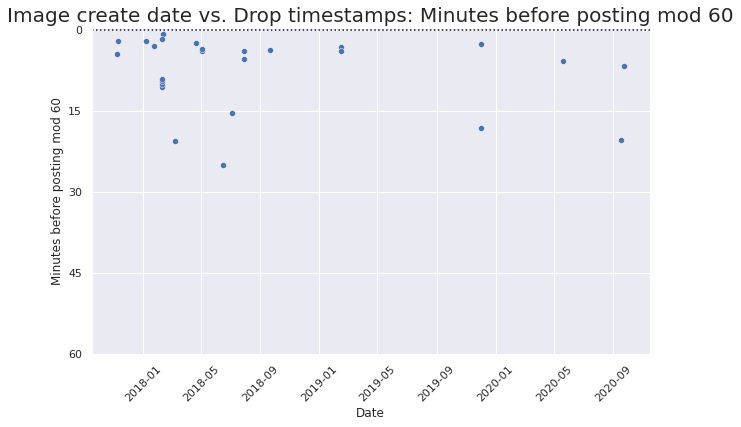

In [77]:
fig, ax1 = plt.subplots(figsize = (10, 6))

plt.xticks(rotation=45)
scatter = sns.scatterplot(data=subset, x='image_date', y='minutes_before_hour_diff')
scatter.set_title('Image create date vs. Drop timestamps: Minutes before posting mod 60', size=20)
plt.xlabel("Date", size=12)
plt.ylabel("Minutes before posting mod 60")
plt.yticks(np.arange(0, 70, 15))
plt.axhline(y=0, ls=':', color='black')
plt.gca().invert_yaxis()
plt.show()

    Fig. 1:

First, we examine the distribution of image creation to posting time differences, and find that they cluster to closely before the hour in all cases. Therefore, we assume that these images were created, for instance, 5 minutes before posting, rather than two hours and five minutes.

In [53]:
within_30 = 100 * len(subset[subset.minutes_before_hour_diff <= 30]) / len(subset)
within_15 = 100 * len(subset[subset.minutes_before_hour_diff <= 15]) / len(subset)
within_5 = 100 * len(subset[subset.minutes_before_hour_diff <= 5]) / len(subset)

print(
    """For the subset of images with a timestamp within 9 hours of their respective drops:
    
    {0:.3g}% appear to have been posted within 30 minutes;
    {1:.3g}% within 15 minutes, and
    {2:.3g}% within 5 minutes.""".format(within_30, within_15, within_5)
)

For the subset of images with a timestamp within 9 hours of their respective drops:
    
    100% appear to have been posted within 30 minutes;
    81.5% within 15 minutes, and
    55.6% within 5 minutes.


Text(2018-07-23 00:00:00, 6.5, '+8')

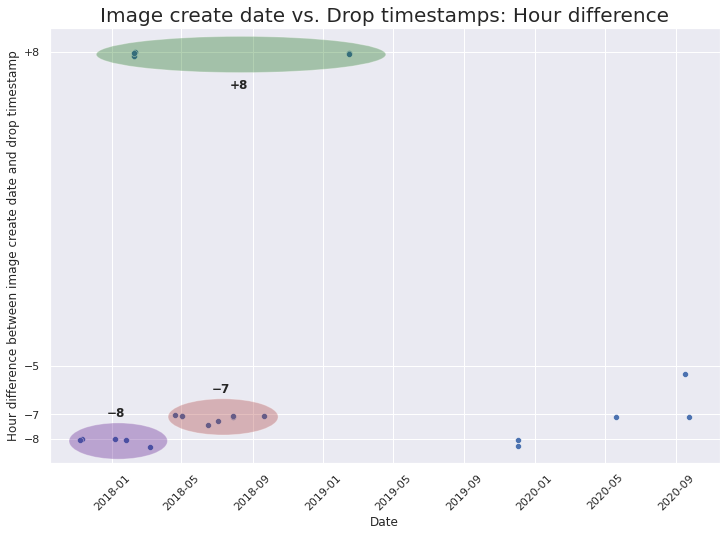

In [181]:
from matplotlib.patches import Ellipse

# Change seaborn plot size
fig, ax1 = plt.subplots(figsize = (12, 8))

plt.xticks(rotation=45)
scatter = sns.scatterplot(data=screenshots, x='image_date', y='timediff')
scatter.set_title('Image create date vs. Drop timestamps: Hour difference', size=20)
scatter.set_ylim(bottom=-9, top=9)

plt.xlabel("Date", size=12)
plt.ylabel("Hour difference between image create date and drop timestamp")
plt.yticks([-8, -7, -5, 8])
l = ax1.set_yticklabels(['−8', '−7', '−5', '+8'])

def draw_ellipse(x, y, width, height, color):
    elps = Ellipse((x, y), width, height, facecolor=color, alpha=0.3)
    ax1.add_artist(elps)


draw_ellipse(datetime.fromisoformat('2018-01-12'), -8.1, 170, 1.5, 'indigo')
plt.text(x = datetime.fromisoformat('2018-01-12') - timedelta(days=20), y = -7.1, s = '−8', weight='bold')

draw_ellipse(datetime.fromisoformat('2018-07-12'), -7.1, 190, 1.5, 'brown')
plt.text(x = datetime.fromisoformat('2018-07-12') - timedelta(days=20), y = -6.1, s = '−7', weight='bold')

draw_ellipse(datetime.fromisoformat('2018-08-12'), 7.9, 500, 1.5, 'darkgreen')
plt.text(x = datetime.fromisoformat('2018-08-12') - timedelta(days=20), y = 6.5, s = '+8', weight='bold')

    Fig. 2:

Observing the distribution of time differences between the timezone-naive image metadata and the UTC timestamp of their respective drops, we see a number of clusters.

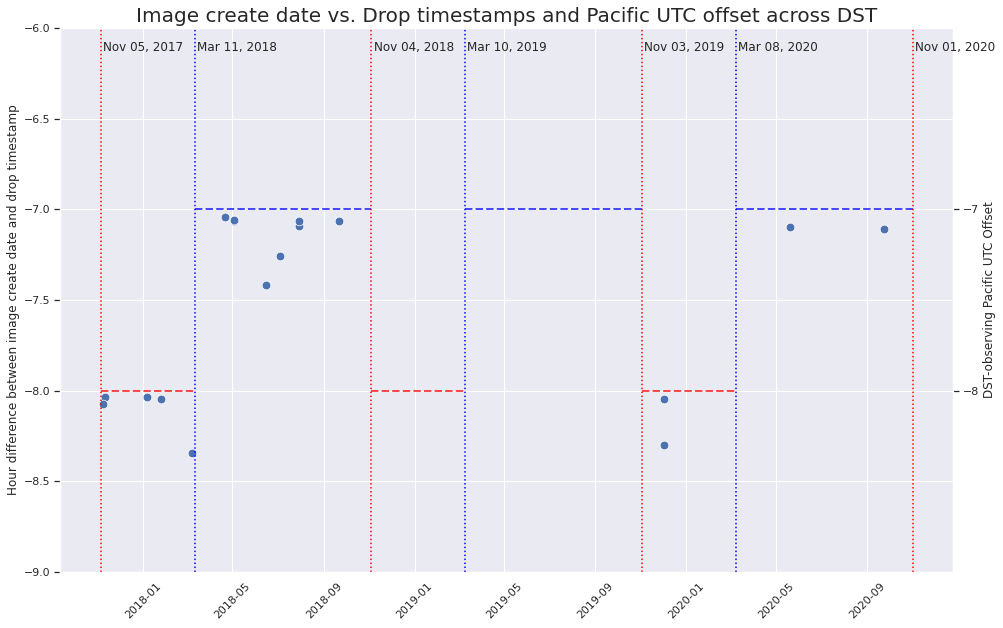

In [75]:
fig, ax1 = plt.subplots(figsize = (16, 10))

plt.xticks(rotation=45)

ax2 = plt.twinx()
scatter = sns.scatterplot(data=screenshots, x='image_date', y='timediff', ax=ax2, s=75)
scatter.set_title('Image create date vs. Drop timestamps and Pacific UTC offset across DST', size=20)
scatter.set_ylim(bottom=-9, top=-6)
plt.xlabel("Date", size=12)
plt.ylabel("DST-observing Pacific UTC Offset")
ax1.set_ylabel("Hour difference between image create date and drop timestamp", size=12) 

plt.yticks([-8, -7])
ax1.set_ylim(ax2.get_ylim())
ax2.set_yticklabels(['−8', '−7'])

dst_dates = [
    datetime.fromisoformat('2017-11-05'),
    datetime.fromisoformat('2018-03-11'),
    datetime.fromisoformat('2018-11-04'),
    datetime.fromisoformat('2019-03-10'),
    datetime.fromisoformat('2019-11-03'),
    datetime.fromisoformat('2020-03-08'),
    datetime.fromisoformat('2020-11-01')
]

color = 'red'
dst_offset = -7
iteration = 0

from datetime import timedelta

for dst in dst_dates:
    plt.axvline(x=dst, ls=':', color=color)
    
    if color == 'red':
        color = 'blue'
    else:
        color = 'red'
    
    if iteration >= 1:
        scatter.axes.hlines(y = dst_offset, color=color, linewidth=2, alpha=.7, ls='--',
                            xmin = dst_dates[iteration - 1], 
                            xmax = dst_dates[iteration])

    plt.text(x = dst + timedelta(days=3), y = -6.125, s = dst.strftime("%b %d, %Y"))
        
    if dst_offset == -8:
        dst_offset = -7
    else:
        dst_offset = -8
        
    iteration += 1


    Fig. 3:
    
Focusing in on the clusters around 7 and 8 hours behind UTC, we see a pattern that corresponds to Daylight Savings Time changes in the Pacific timezone, which goes from UTC-7 to UTC-8 throughout the year on these dates.